In [1]:
!pip install xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline
from datetime import timedelta

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [20]:
train = pd.read_excel('Review1.xlsx', parse_dates=['Day Index'])
train.head(10)

,Day Index,Sessions
0,2016-04-01,0
1,2016-04-02,0
2,2016-04-03,0
3,2016-04-04,0
4,2016-04-05,0
5,2016-04-06,0
6,2016-04-07,0
7,2016-04-08,32205
8,2016-04-09,23973
9,2016-04-10,23762


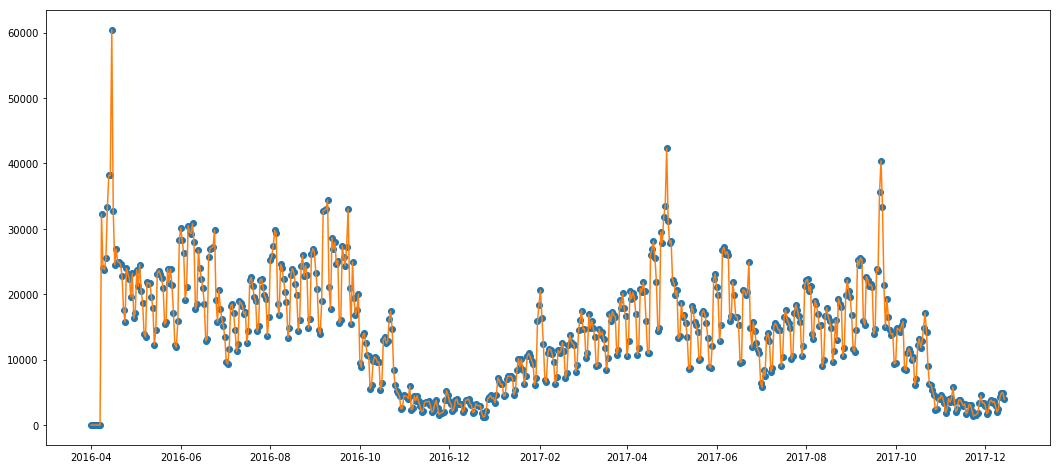

In [28]:
fig = plt.figure(1,figsize=[18,8])

plt.plot_date(train['Day Index'], train['Sessions'])
plt.plot(train['Day Index'], train['Sessions'])

In [25]:
days = [r for r in range(len(train['Day Index']))]

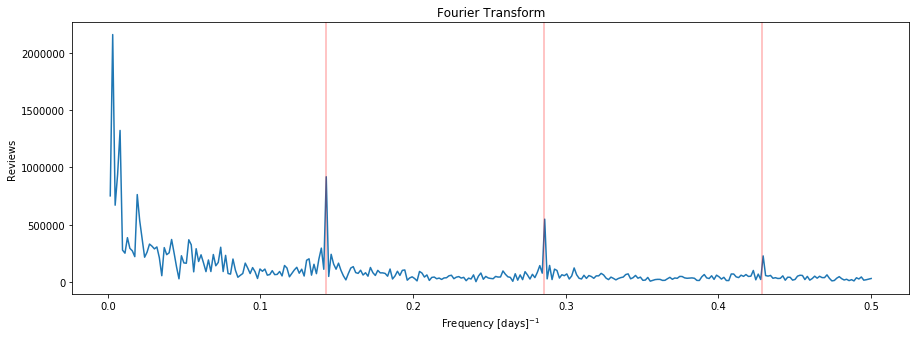

In [27]:
from scipy.fftpack import fft

fig = plt.figure(2,figsize=[15,5])
fft_complex = fft(train['Sessions'])
fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]
fft_xvals = [day / days[-1] for day in days]
npts = len(fft_xvals) // 2 + 1
fft_mag = fft_mag[:npts]
fft_xvals = fft_xvals[:npts]

plt.ylabel('Reviews')
plt.xlabel(r"Frequency [days]$^{-1}$")
plt.title('Fourier Transform')
plt.plot(fft_xvals[1:],fft_mag[1:])
# Draw lines at 1, 1/2, and 1/3 week periods
plt.axvline(x=1./7,color='red',alpha=0.3)
plt.axvline(x=2./7,color='red',alpha=0.3)
plt.axvline(x=3./7,color='red',alpha=0.3)

plt.show()

In [32]:
train_idx = train.set_index('Day Index')

In [33]:
train_idx.index

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
               '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08',
               '2016-04-09', '2016-04-10',
               ...
               '2017-12-05', '2017-12-06', '2017-12-07', '2017-12-08',
               '2017-12-09', '2017-12-10', '2017-12-11', '2017-12-12',
               '2017-12-13', '2017-12-14'],
              dtype='datetime64[ns]', name='Day Index', length=623, freq=None)

In [38]:
session = train_idx['Sessions']

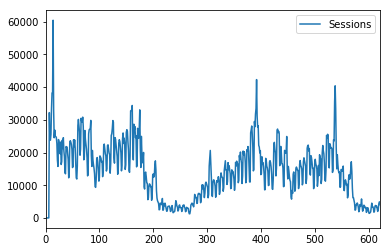

In [29]:
train.plot()

E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """Entry point for launching an IPython kernel.


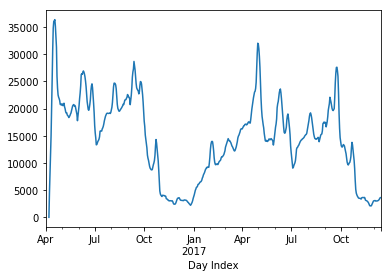

In [40]:
pd.rolling_mean(session,7).plot()

In [41]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

E:\Application\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


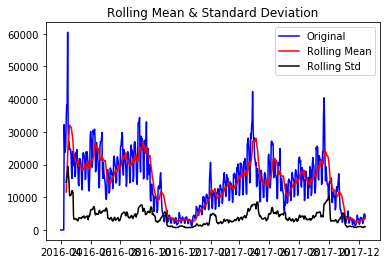

Results of Dickey-Fuller Test:
Test Statistic                  -2.554511
p-value                          0.102768
#Lags Used                      14.000000
Number of Observations Used    608.000000
Critical Value (1%)             -3.441151
Critical Value (5%)             -2.866305
Critical Value (10%)            -2.569308
dtype: float64


In [42]:
test_stationarity(session)

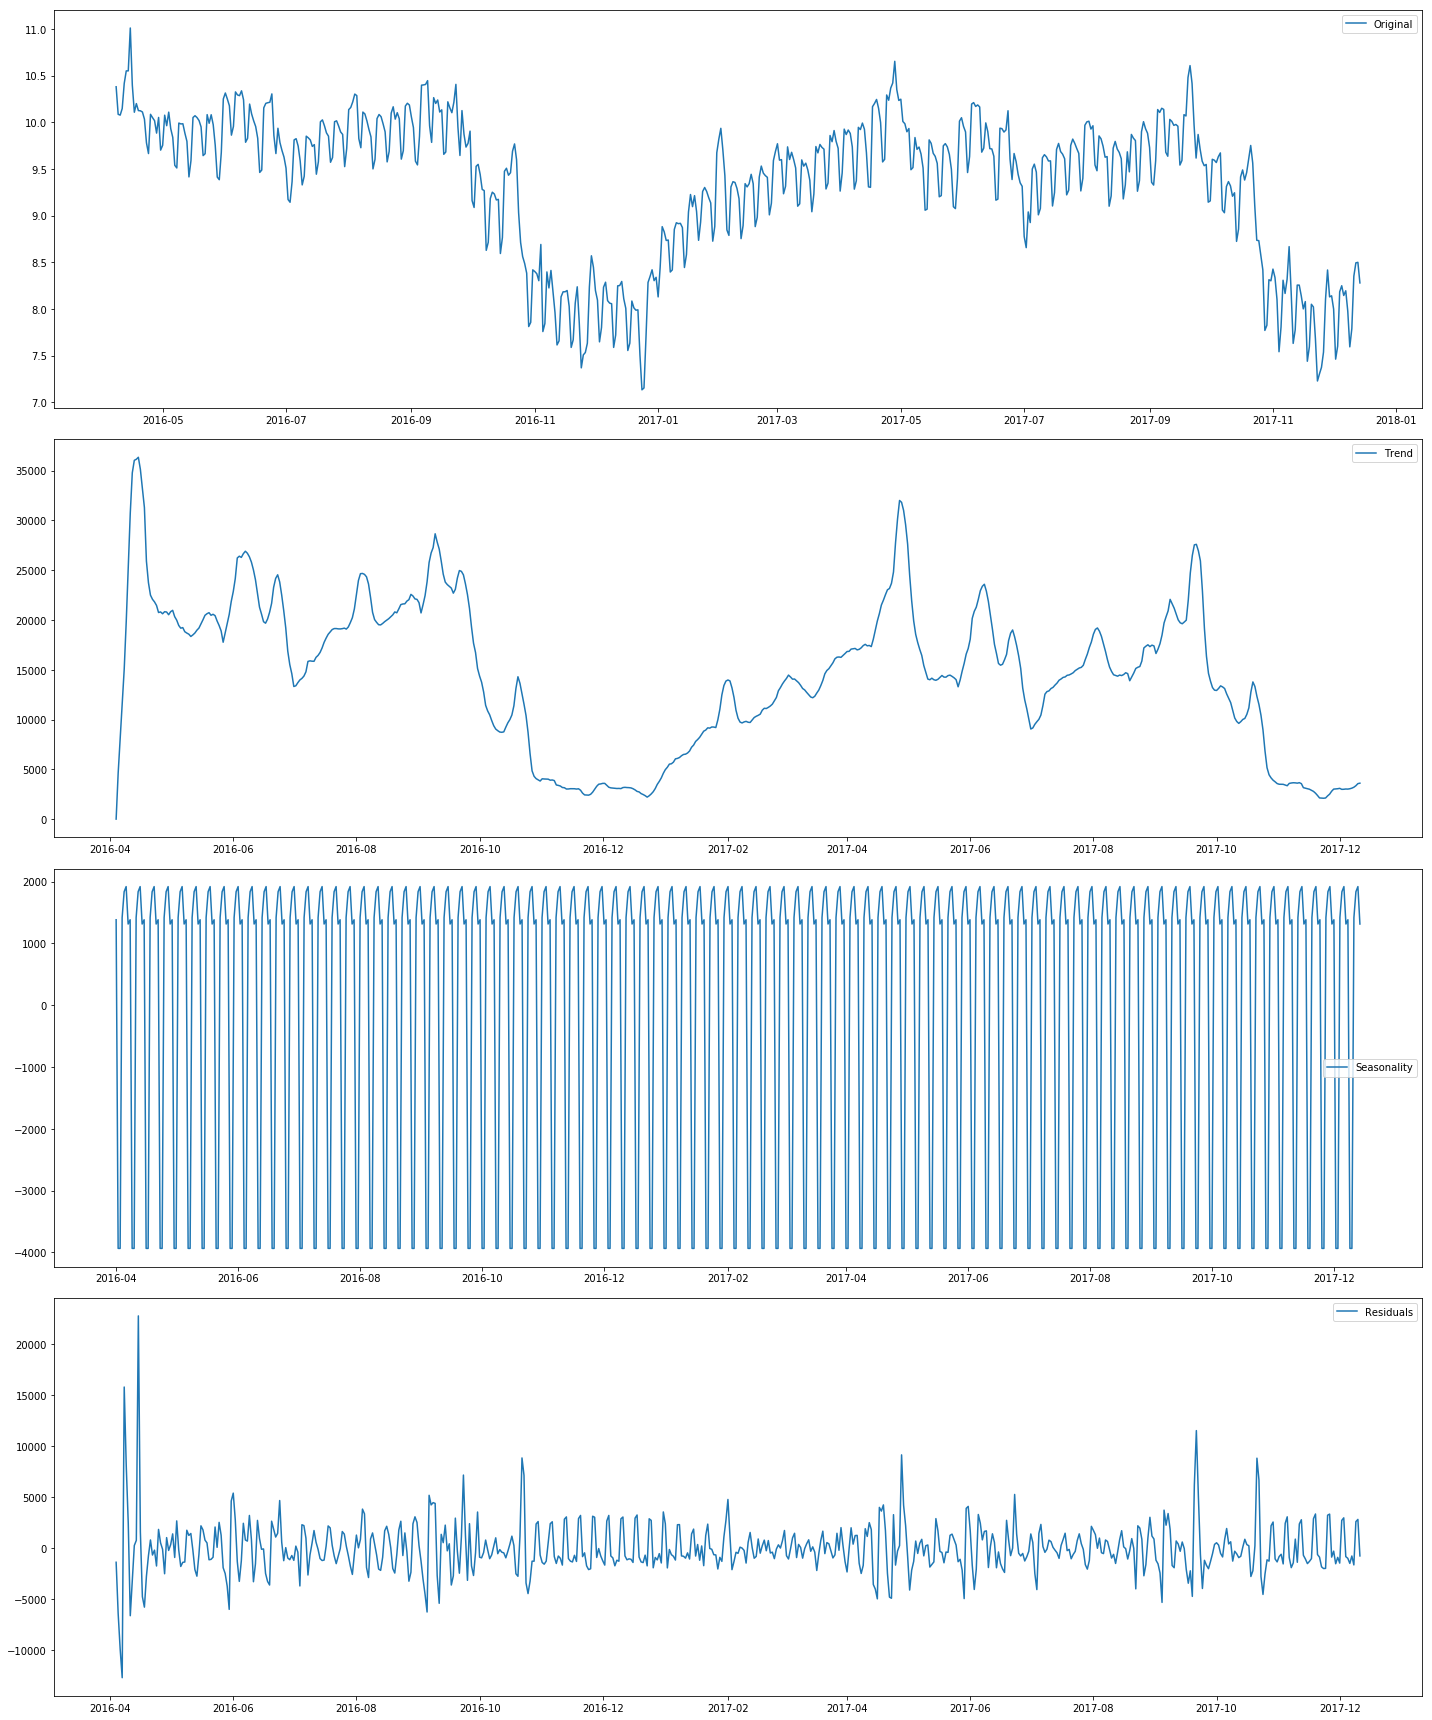

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(session)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize = (20,24))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.plot(session_log, label='Original')
ax1.legend(loc='best')
ax2.plot(trend, label='Trend')
ax2.legend(loc='best')
ax3.plot(seasonal,label='Seasonality')
ax3.legend(loc='best')
ax4.plot(residual, label='Residuals')
ax4.legend(loc='best')
plt.tight_layout()

E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
E:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


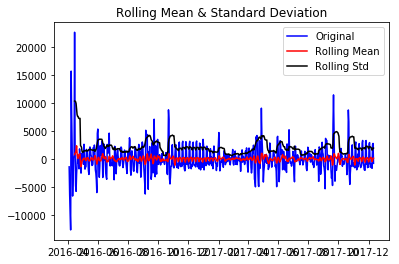

Results of Dickey-Fuller Test:
Test Statistic                -1.043090e+01
p-value                        1.611755e-18
#Lags Used                     1.800000e+01
Number of Observations Used    5.980000e+02
Critical Value (1%)           -3.441333e+00
Critical Value (5%)           -2.866385e+00
Critical Value (10%)          -2.569350e+00
dtype: float64


In [46]:
session_decompose = residual
session_decompose.dropna(inplace=True)
test_stationarity(session_decompose)

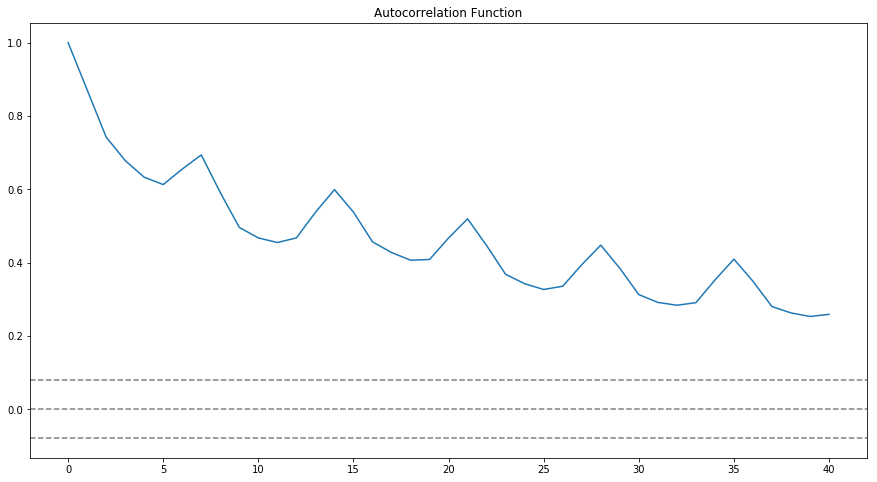

In [66]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(session)
lag_pacf = pacf(session)

#Plot ACF: 
fig = plt.figure(figsize = (15,8))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(session)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(session)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


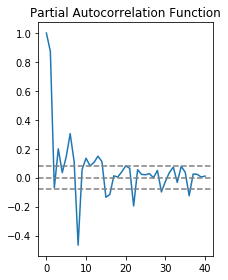

In [67]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(session)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(session)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [71]:
from statsmodels.tsa.arima_model import ARIMA
import itertools

In [73]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
#warnings.filterwarnings("ignore") # specify to ignore warning messages

best_score, best_pdq, best_seasonal = float("inf"), None, None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < best_score:
                best_score, best_pdq, best_seasonal = results.aic, param,param_seasonal
                

        except:
            continue
print('ARIMA{}x{}12 - AIC:{}'.format(best_pdq, best_seasonal, best_score))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMANonexNone12 - AIC:inf


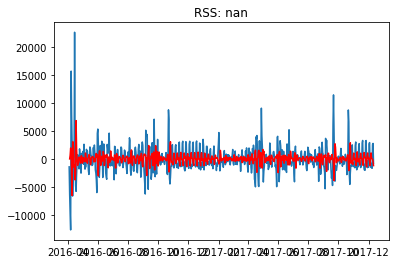

In [78]:
model = ARIMA(session_decompose, order=(2, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(session_decompose)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-session_decompose)**2))

In [ ]:
results_ARIMA.predict